<a href="https://colab.research.google.com/github/kenlo94/Affordable_Housing_2023/blob/rob_data_analytics/Imperial%26Kings_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPERIAL COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['Imperial County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving Imperial County.csv to Imperial County.csv
            Imperial County
Dates                      
2000-01-31              NaN
2000-02-29              NaN
2000-03-31              NaN
2000-04-30              NaN
2000-05-31              NaN
...                     ...
2021-12-31         305976.0
2022-01-31         308361.0
2022-02-28         313875.0
2022-03-31         316996.0
2022-04-30         321441.0

[268 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Imperial County
Dates,
2001-01-31,89181.0
2001-02-28,89352.0
2001-03-31,89709.0
2001-04-30,90411.0
2001-05-31,91161.0
...,...
2021-12-31,305976.0
2022-01-31,308361.0
2022-02-28,313875.0


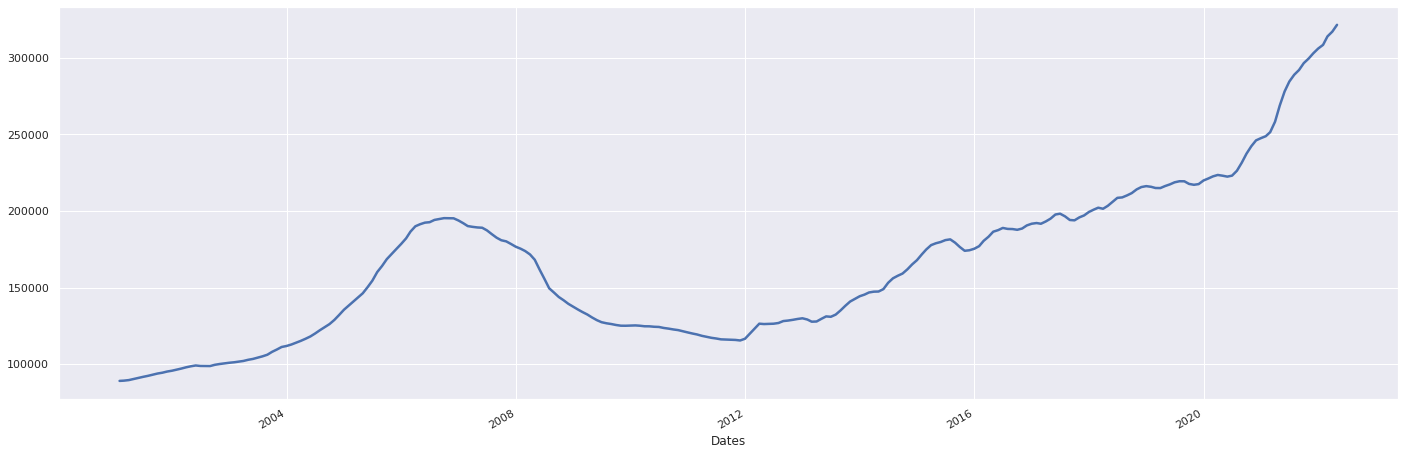

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Imperial County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

254

In [ ]:
DATOS = RealData_df['Imperial County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(216, 2, 1) (216, 1)
(36, 2, 1) (36, 1)


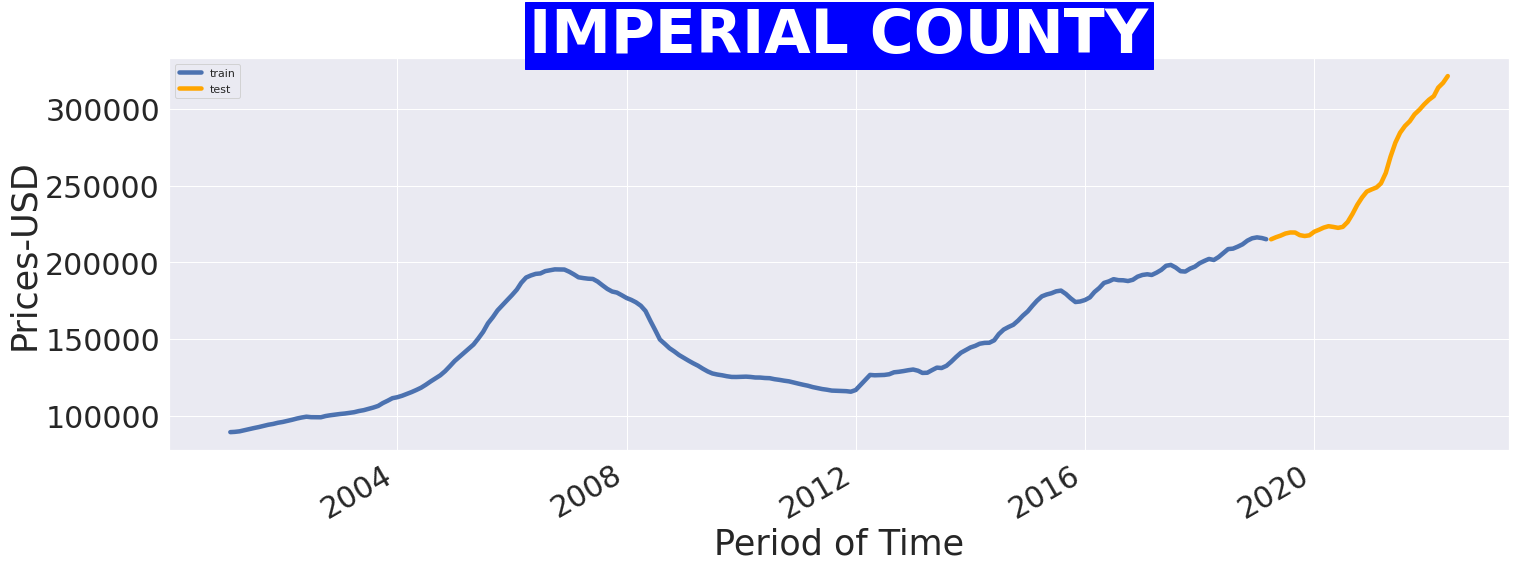

In [ ]:
RealData_df['Imperial County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Imperial County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("IMPERIAL COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
43/43 [==============================] - 3s 20ms/step - loss: 0.2066 - mean_absolute_error: 0.4055 - val_loss: 1.1581 - val_mean_absolute_error: 1.0124
Epoch 2/60
43/43 [==============================] - 0s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.1907 - val_loss: 0.1701 - val_mean_absolute_error: 0.3656
Epoch 3/60
43/43 [==============================] - 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0447 - val_loss: 0.0467 - val_mean_absolute_error: 0.1663
Epoch 4/60
43/43 [==============================] - 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0405 - val_loss: 0.0511 - val_mean_absolute_error: 0.1786
Epoch 5/60
43/43 [==============================] - 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0393 - val_loss: 0.0332 - val_mean_absolute_error: 0.1396
Epoch 6/60
43/43 [==============================] - 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0390 - val_loss: 0.0295 - val_mean_absolute_error: 0.1308
Epoch 7/60
43/43 [=========

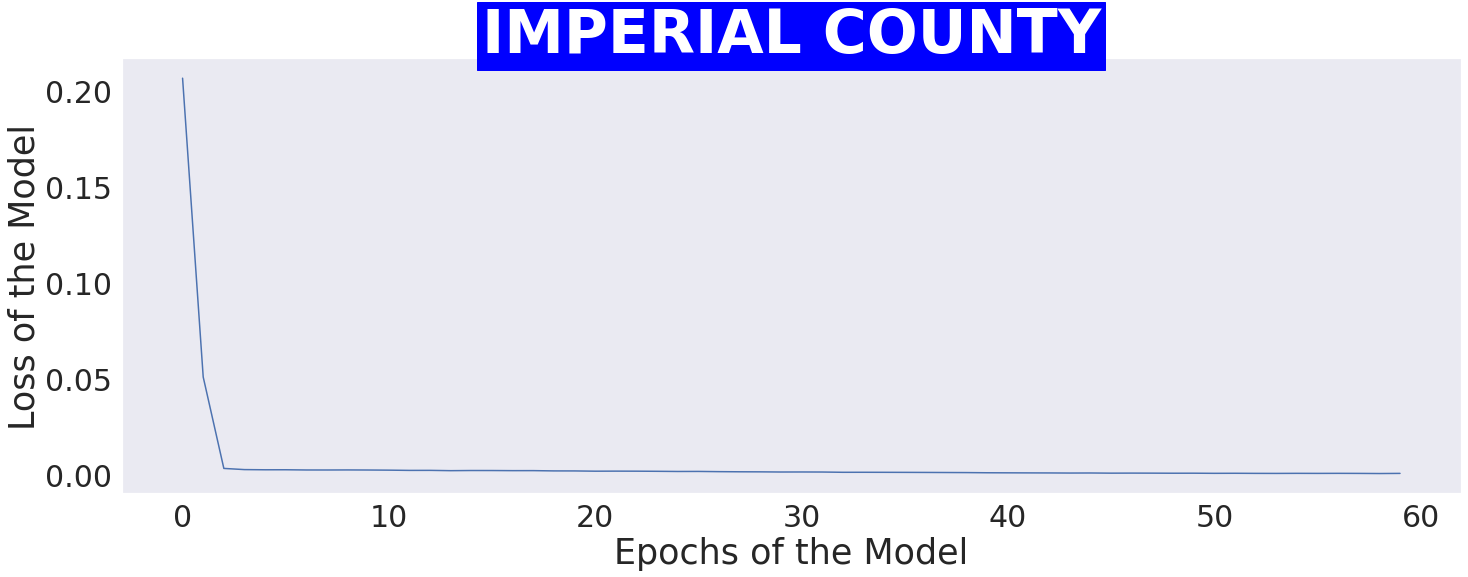

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("IMPERIAL COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([1.0270349, 1.0442002, 1.0686681, 1.0756408, 1.0696551, 1.0283571,
       1.0270871, 1.0423102, 1.0960339, 1.1108354, 1.1343389, 1.1471602,
       1.1290921, 1.1174132, 1.1375105, 1.2104182, 1.3160597, 1.4222497,
       1.5033618, 1.565002 , 1.57733  , 1.6001742, 1.6564211, 1.8060619,
       2.0222747, 2.1934333, 2.3109677, 2.393794 , 2.454686 , 2.5501683,
       2.6090941, 2.6829789, 2.747625 , 2.797515 , 2.919374 , 2.9844546],
      dtype=float32)

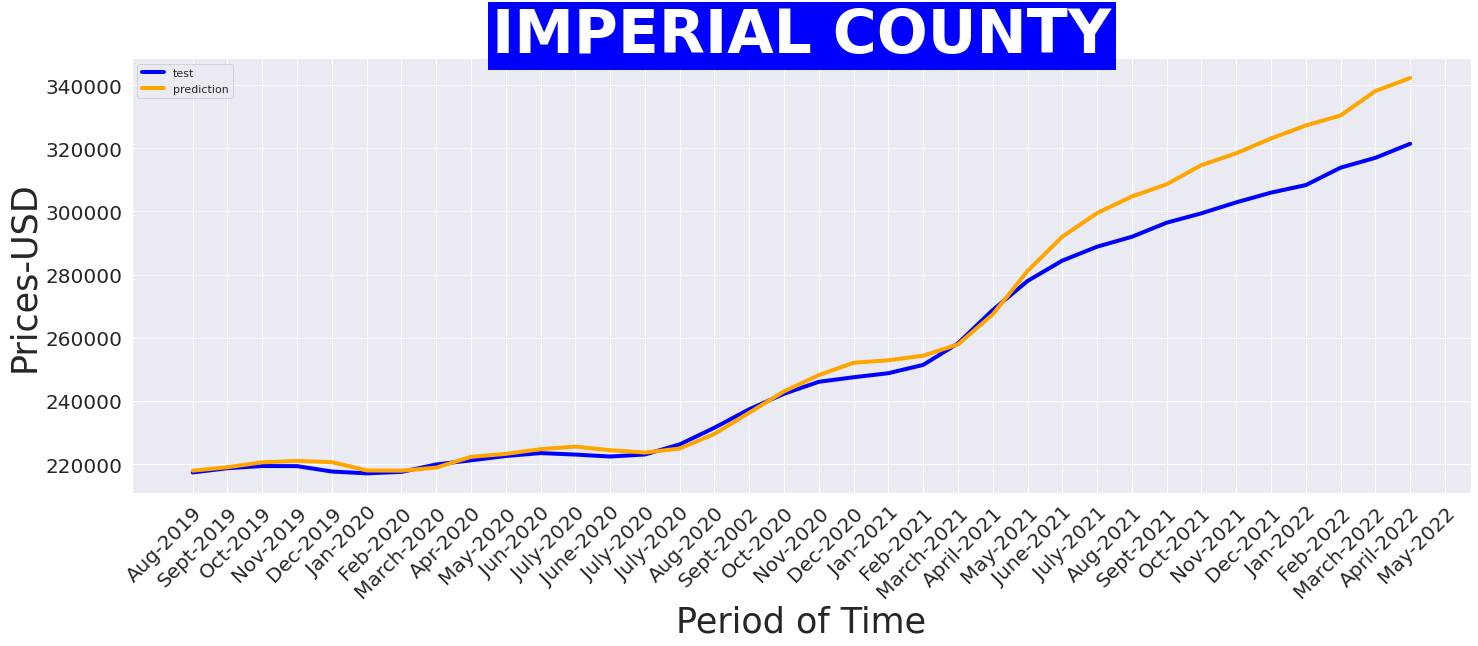

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("IMPERIAL COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'IMPERIAL COUNTY')

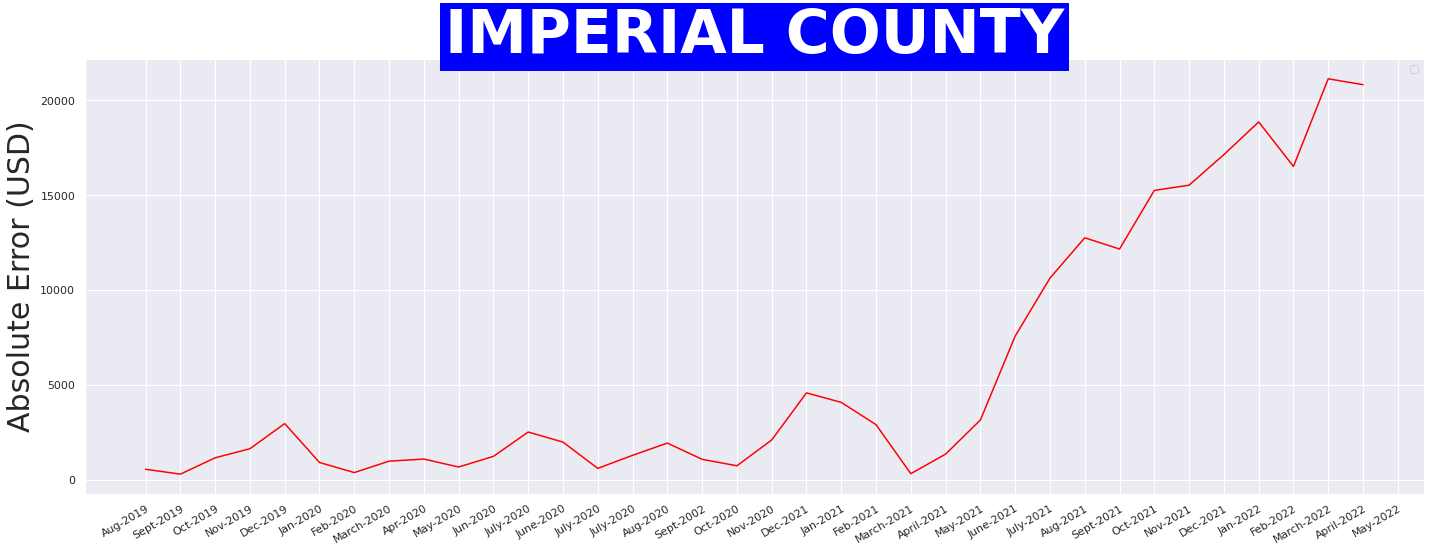

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("IMPERIAL COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

#plt.grid()

In [ ]:
y_pred_inv

array([[217937.23],
       [219027.58],
       [220581.77],
       [221024.66],
       [220644.45],
       [218021.22],
       [217940.55],
       [218907.53],
       [222320.02],
       [223260.2 ],
       [224753.14],
       [225567.53],
       [224419.86],
       [223678.02],
       [224954.61],
       [229585.66],
       [236295.95],
       [243041.08],
       [248193.28],
       [252108.64],
       [252891.7 ],
       [254342.75],
       [257915.55],
       [267420.66],
       [281154.38],
       [292026.28],
       [299492.  ],
       [304753.1 ],
       [308620.9 ],
       [314685.9 ],
       [318428.84],
       [323121.97],
       [327228.25],
       [330397.25],
       [338137.7 ],
       [342271.56]], dtype=float32)

# **KING COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['Kings County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving Kings County.csv to Kings County (1).csv
            Kings County
Dates                   
2000-01-31           NaN
2000-02-29           NaN
2000-03-31           NaN
2000-04-30           NaN
2000-05-31           NaN
...                  ...
2021-12-31      310150.0
2022-01-31      314683.0
2022-02-28      319627.0
2022-03-31      324745.0
2022-04-30      330895.0

[268 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Kings County
Dates,
2001-01-31,98192.0
2001-02-28,98457.0
2001-03-31,98869.0
2001-04-30,99547.0
2001-05-31,100112.0
...,...
2021-12-31,310150.0
2022-01-31,314683.0
2022-02-28,319627.0


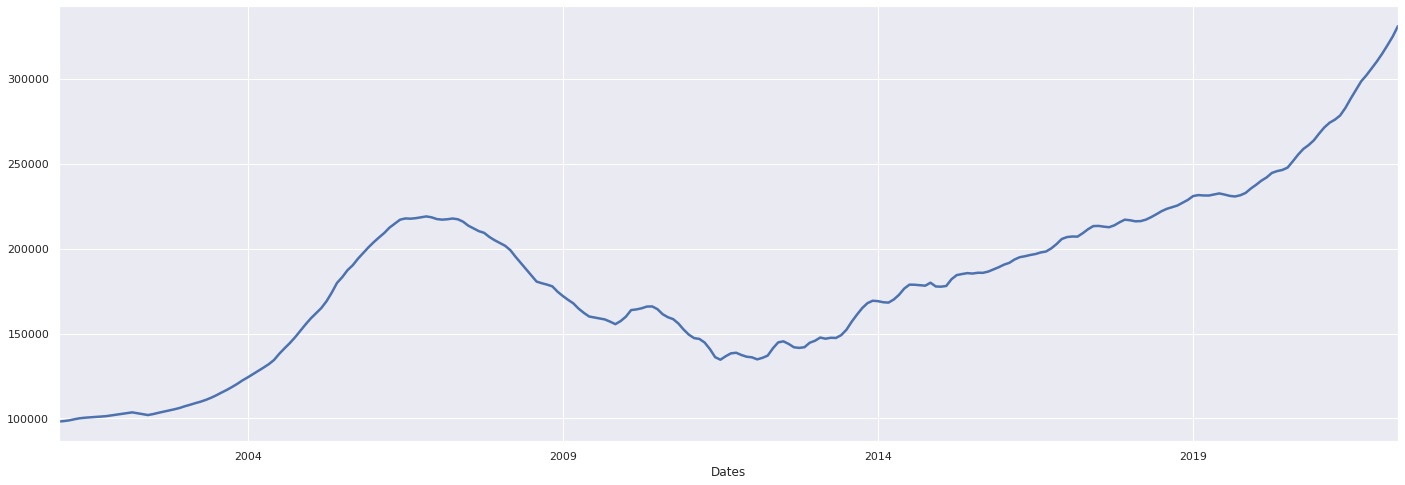

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Kings County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

256

In [ ]:
DATOS = RealData_df['Kings County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(216, 2, 1) (216, 1)
(36, 2, 1) (36, 1)


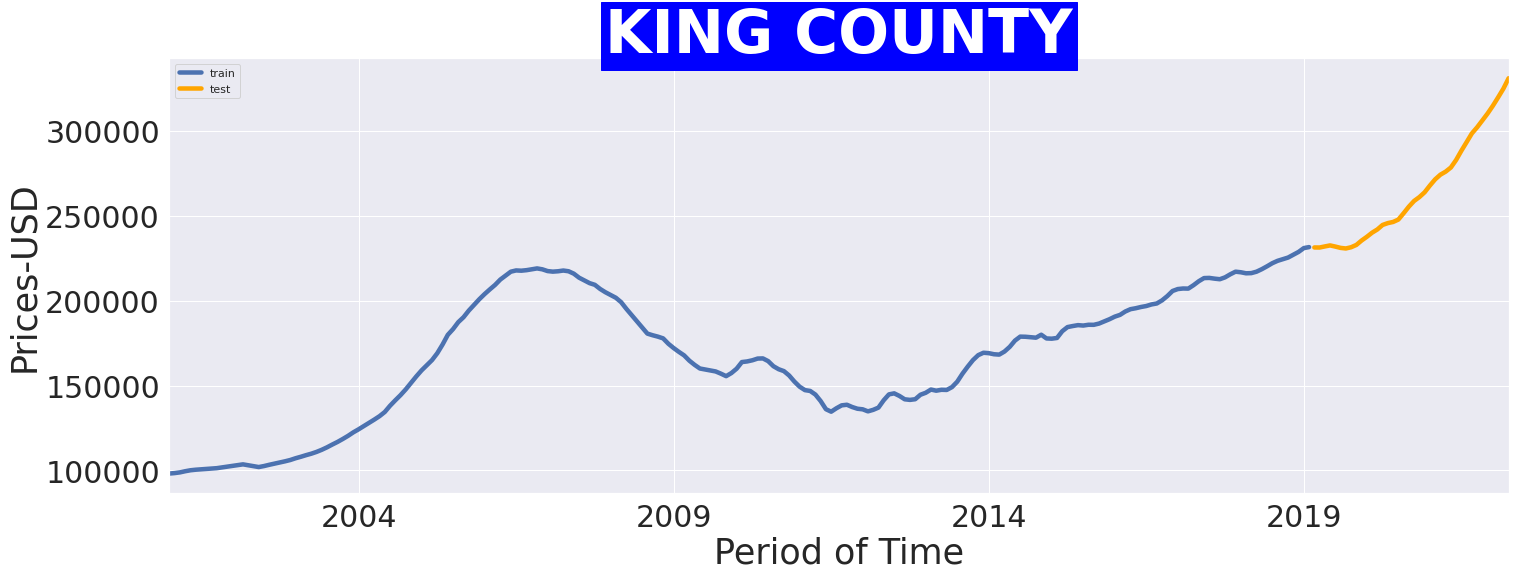

In [ ]:
RealData_df['Kings County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Kings County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("KING COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
44/44 [==============================] - 3s 17ms/step - loss: 0.2008 - mean_absolute_error: 0.3759 - val_loss: 0.8024 - val_mean_absolute_error: 0.8502
Epoch 2/60
44/44 [==============================] - 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.1740 - val_loss: 0.1077 - val_mean_absolute_error: 0.2995
Epoch 3/60
44/44 [==============================] - 0s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0467 - val_loss: 0.0192 - val_mean_absolute_error: 0.1078
Epoch 4/60
44/44 [==============================] - 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0411 - val_loss: 0.0190 - val_mean_absolute_error: 0.1066
Epoch 5/60
44/44 [==============================] - 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0406 - val_loss: 0.0350 - val_mean_absolute_error: 0.1554
Epoch 6/60
44/44 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0405 - val_loss: 0.0077 - val_mean_absolute_error: 0.0669
Epoch 7/60
44/44 [=========

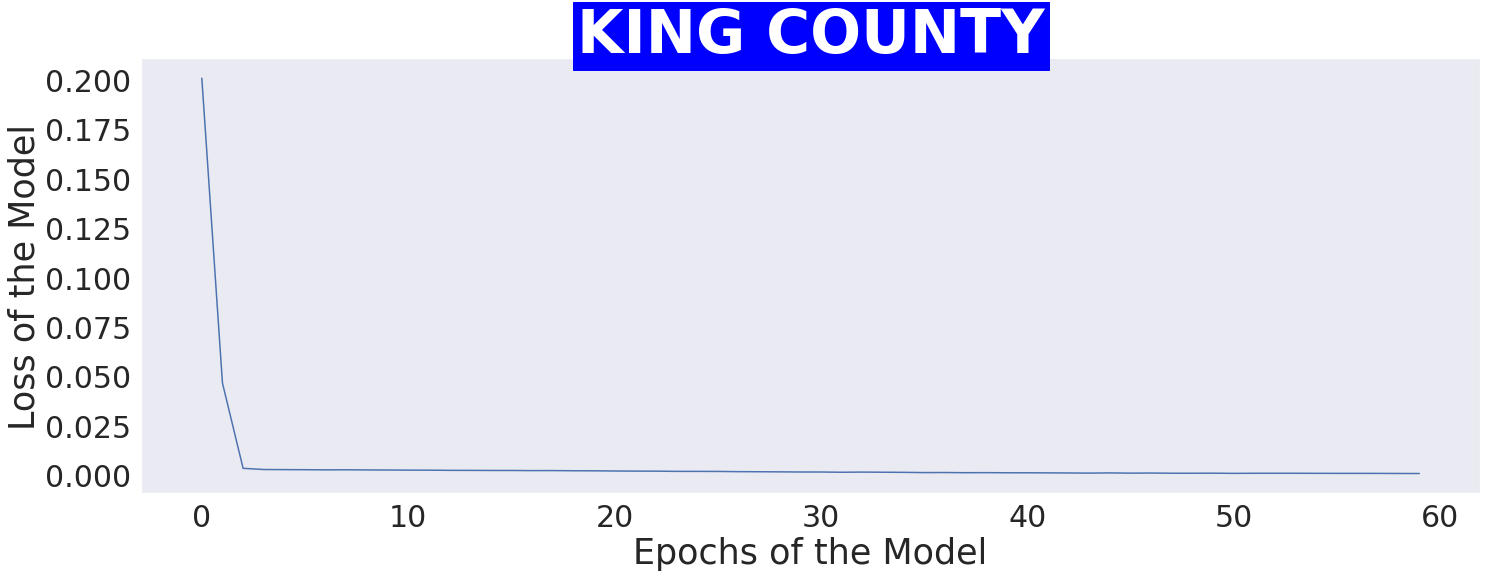

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("KING COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.92812747, 0.9421582 , 0.95080125, 0.9328249 , 0.92036605,
       0.91785926, 0.9352046 , 0.9599092 , 1.0067661 , 1.0382899 ,
       1.0770755 , 1.1041082 , 1.149641  , 1.1590201 , 1.167735  ,
       1.1938572 , 1.2646061 , 1.3283377 , 1.38062   , 1.4138323 ,
       1.4630737 , 1.5332686 , 1.5939577 , 1.6383585 , 1.6667423 ,
       1.7108414 , 1.7921218 , 1.8884134 , 1.9769255 , 2.0674565 ,
       2.1304257 , 2.2035115 , 2.2772973 , 2.359158  , 2.4485438 ,
       2.5413518 ], dtype=float32)

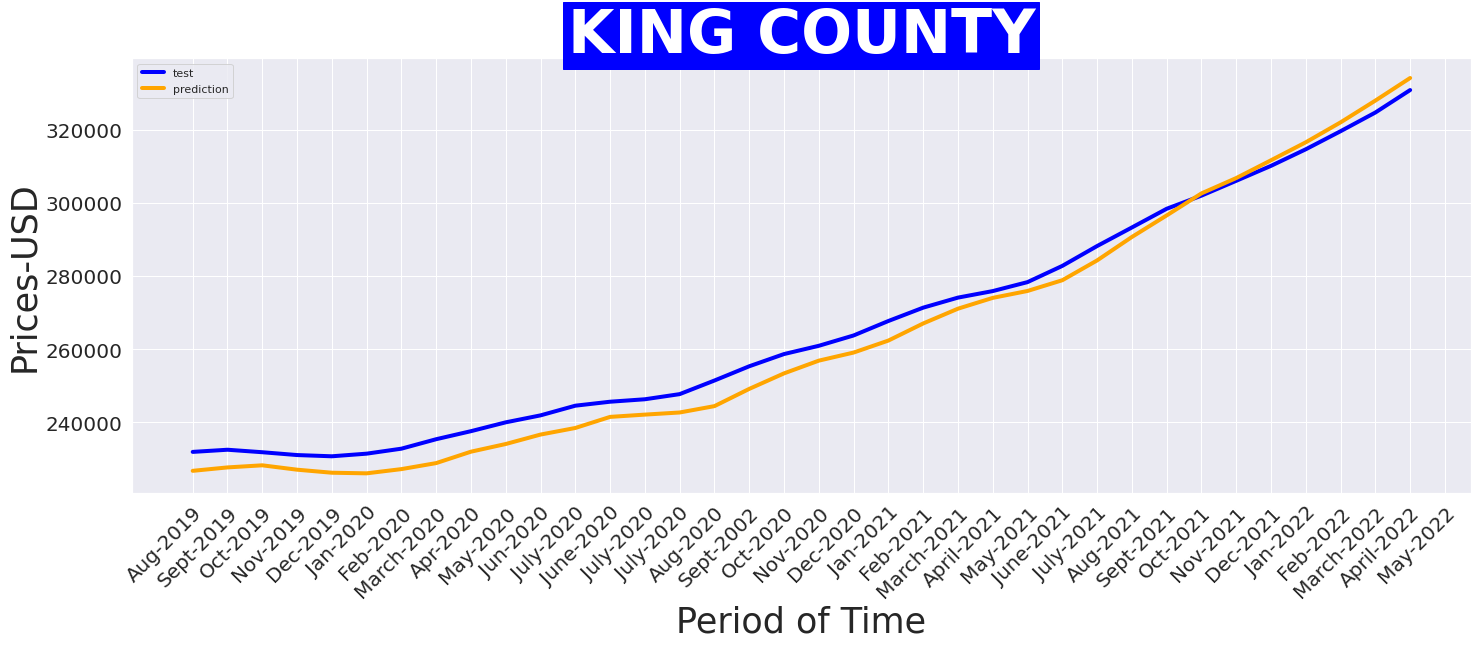

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.title("KING COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'KING COUNTY')

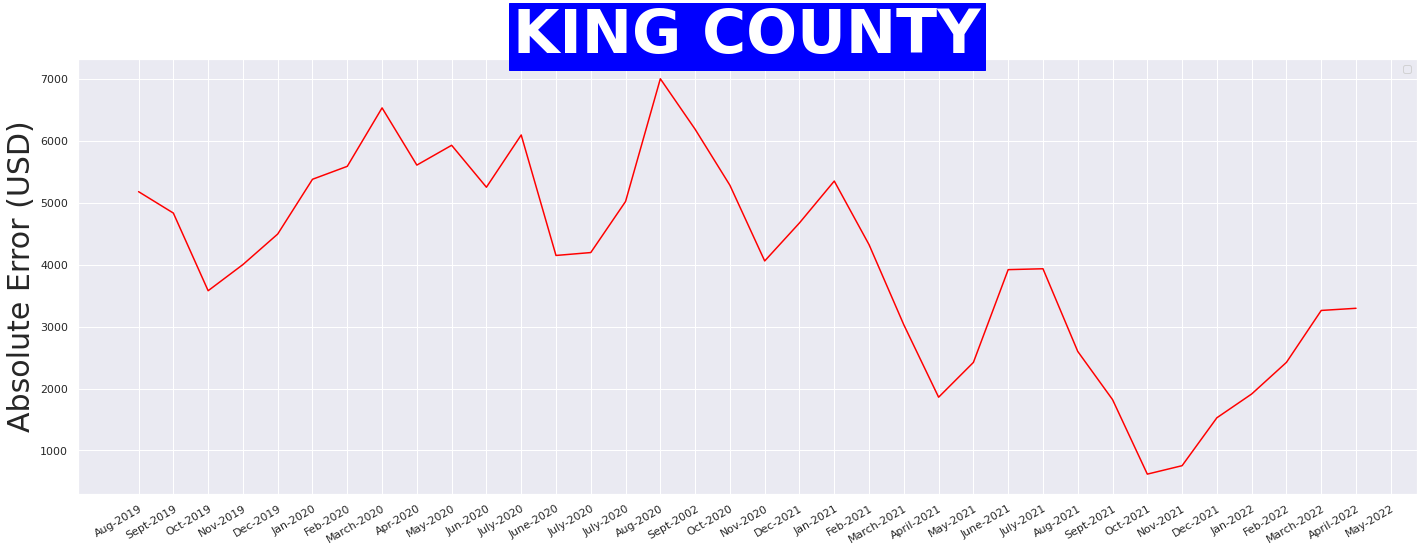

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("KING COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
#plt.grid()

In [ ]:
y_pred_inv

array([[226685.3 ],
       [227620.33],
       [228196.33],
       [226998.36],
       [226168.06],
       [226001.02],
       [227156.94],
       [228803.28],
       [231925.89],
       [234026.7 ],
       [236611.42],
       [238412.92],
       [241447.3 ],
       [242072.34],
       [242653.11],
       [244393.92],
       [249108.75],
       [253355.9 ],
       [256840.08],
       [259053.4 ],
       [262334.9 ],
       [267012.8 ],
       [271057.22],
       [274016.16],
       [275907.72],
       [278846.53],
       [284263.16],
       [290680.22],
       [296578.78],
       [302611.9 ],
       [306808.25],
       [311678.8 ],
       [316596.  ],
       [322051.34],
       [328008.12],
       [334193.  ]], dtype=float32)